In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.isnull().values.any()

False

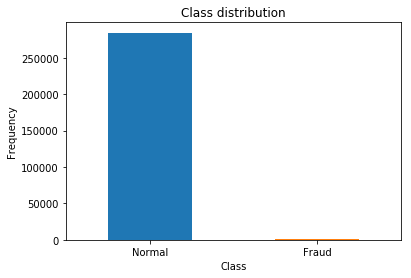

In [5]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
Labels = ["Normal", "Fraud"]
plt.title("Class distribution")
plt.xticks(range(2), Labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3), '% of the dataset')

No Frauds 99.827 % of the dataset
Frauds 0.173 % of the dataset


Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous. Imagine our training data is the one illustrated in graph above. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99%), but obviously, this model won’t provide any valuable information for us.

In this case, other alternative evaluation metrics can be applied such as:

#Precision/Specificity: how many selected instances are relevant.
#Recall/Sensitivity: how many relevant instances are selected.
#F1 score: harmonic mean of precision and recall.
#MCC: correlation coefficient between the observed and predicted binary classifications.
#AUC: relation between true-positive rate and false positive rate.

In [7]:
import keras
import numpy as np
np.random.seed(2)
import seaborn as sns
%matplotlib inline
import os
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

C:\Users\akhil\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [10]:
df['Amount_Normalized']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
# Dropping the actual Amount column from the dataset.
df=df.drop(['Amount'],axis=1)

In [12]:
#Droping irrelevant Time column from dataset.
df=df.drop(['Time'],axis=1)

In [14]:
# Assigning X and Y 
X=df.iloc[:,df.columns!='Class']
y=df.iloc[:,df.columns=='Class']

# Splitting Data into train and test 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [16]:
# As we have to supply the X test,X_Train,ytest,y_train into deep learning models so we have to convert it into numpy arrays.
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# Deep Neural Network
Model Definition:

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the sequential layer. It takes 16 units it is a Positive integer, it specifies dimensionality of the output space and the activation function used in this layer is relu

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network. 'sigmoid' The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In second layer I have used 24 units and used activation function relu.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting. As the dataset is large I have opted for 0.5 dropout.

In third layer I have used 20 units and used activation function relu.

In fourth layer I have used 24 units and used activation function relu.

In last layer output should be 1 so i have used 1 and used activation function sigmoid.

In [17]:
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [18]:
model = Sequential([
     #First Layer
     Dense(units=16, input_dim=29, activation='relu'),
      #Second Layer
     Dense(units=24,activation='relu'),
     Dropout(0.5),
      #Third Layer
     Dense(20,activation='relu'),
     #Fourth Layer
     Dense(24,activation='relu'),
     #Fifth Layer
     Dense(1,activation='sigmoid')          
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


Setting Optimizer and Loss Function
Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

Loss Function : We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (=2 classes) called the binary_crossentropy".

The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss.

I choosed Adam optimizer because it combines the advantages of two other extensions of stochastic gradient descent. Specifically:

1. Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

2. Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

I have used 10 epochs and batch size of 15

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs= 10)

Epoch 1/10
199364/199364 [==============================] - 18s 90us/step - loss: 0.0099 - acc: 0.9979
Epoch 2/10
199364/199364 [==============================] - 17s 86us/step - loss: 0.0040 - acc: 0.9994
Epoch 3/10
199364/199364 [==============================] - 17s 87us/step - loss: 0.0036 - acc: 0.9993
Epoch 4/10
199364/199364 [==============================] - 17s 85us/step - loss: 0.0036 - acc: 0.9993
Epoch 5/10
199364/199364 [==============================] - 18s 89us/step - loss: 0.0035 - acc: 0.9994
Epoch 6/10
199364/199364 [==============================] - 16s 82us/step - loss: 0.0034 - acc: 0.9993
Epoch 7/10
199364/199364 [==============================] - 16s 81us/step - loss: 0.0034 - acc: 0.9994
Epoch 8/10
199364/199364 [==============================] - 16s 82us/step - loss: 0.0032 - acc: 0.9994
Epoch 9/10
199364/199364 [==============================] - 18s 88us/step - loss: 0.0033 - acc: 0.9994
Epoch 10/10
199364/199364 [==============================] - 16s 81us/ste

In [20]:
score=model.evaluate(X_test,y_test)
print(score)

85443/85443 [==============================] - 2s 19us/step
[0.004075247818148134, 0.9993914071369217]


In [21]:
y_pred=model.predict(X_test)
y_test=pd.DataFrame(y_test)

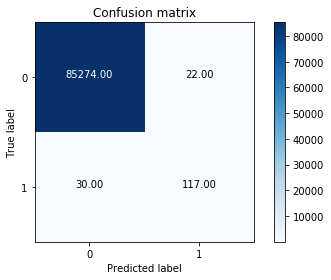

In [22]:
cnf_matrix=confusion_matrix(y_test,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# Synthetic Minority Over-sampling Technique (SMOTE)

In [23]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

In [24]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state=0)

In [26]:
X_train = np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# Applying Keras Sequential Model on Oversampled dataset

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=15, epochs=10)

Epoch 1/10
398041/398041 [==============================] - 36s 90us/step - loss: 0.0378 - acc: 0.9866
Epoch 2/10
398041/398041 [==============================] - 34s 84us/step - loss: 0.0136 - acc: 0.9963
Epoch 3/10
398041/398041 [==============================] - 38s 95us/step - loss: 0.0110 - acc: 0.9972
Epoch 4/10
398041/398041 [==============================] - 51s 129us/step - loss: 0.0099 - acc: 0.9975
Epoch 5/10
398041/398041 [==============================] - 37s 92us/step - loss: 0.0091 - acc: 0.9978
Epoch 6/10
398041/398041 [==============================] - 30s 77us/step - loss: 0.0093 - acc: 0.9980
Epoch 7/10
398041/398041 [==============================] - 32s 81us/step - loss: 0.0083 - acc: 0.9981
Epoch 8/10
398041/398041 [==============================] - 35s 88us/step - loss: 0.0080 - acc: 0.9982
Epoch 9/10
398041/398041 [==============================] - 31s 79us/step - loss: 0.0079 - acc: 0.9982
Epoch 10/10
398041/398041 [==============================] - 30s 76us/st

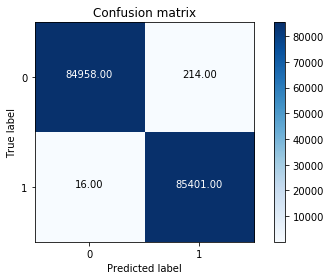

In [28]:
y_pred=model.predict(X_test)
y_expected=pd.DataFrame(y_test)

cnf_matrix=confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

# Confusion Matrix for entire dataset

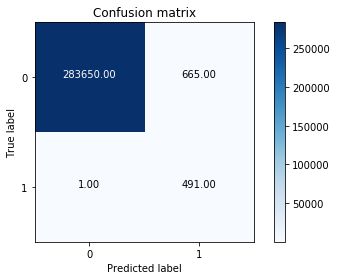

In [29]:
y_pred=model.predict(X)

cnf_matrix=confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()